<a href="https://colab.research.google.com/github/k-ganda/classification_ml/blob/main/maternal_health_risk_prediction/summative1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maternal Health Risk Prediction

This notebook aims to build a Neural network model using tensorflow to predict maternal risks for pregnant patients. This follows a proposal document I wrote earlier. For more context fins the link below: https://docs.google.com/document/d/1KAsk1YrdaiXI2Q015fEb5ha4MkMSE2GegZXmCcHZK78/edit?usp=sharing


**ABOUT DATASET**

The dataset used here is publicly available from Kaggle:
https://www.kaggle.com/datasets/csafrit2/maternal-health-risk-data/data


**Variables**

*Age:* Age in years when a woman is pregnant.

*SystolicBP:* Upper value of Blood Pressure in mmHg, another significant attribute during pregnancy.

*DiastolicBP:* Lower value of Blood Pressure in mmHg, another significant attribute during pregnancy.

*BS:* Blood glucose levels is in terms of a molar concentration, mmol/L.

*HeartRate:* A normal resting heart rate in beats per minute.

*Risk Level:* Predicted Risk Intensity Level during pregnancy considering the previous attribute.



**IMPLEMENTATION**

2 models will be implemented,

i. Vanilla model - Simple model without any optimization techniques.

ii. Model applying at least 3 optimization techniques.

We will then make predictions using test data.

# Data Loading


In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Loading the dataset using pandas
df = pd.read_csv('maternal_health_risk.csv')
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


# Data Cleaning

In [4]:
# Let's check for null values
df.isnull().sum()

,0
Age,0
SystolicBP,0
DiastolicBP,0
BS,0
BodyTemp,0
HeartRate,0
RiskLevel,0


In [ ]:
df[df.duplicated()]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
67,19,120,80,7.0,98.0,70,mid risk
72,19,120,80,7.0,98.0,70,mid risk
97,19,120,80,7.0,98.0,70,mid risk
106,50,140,90,15.0,98.0,90,high risk
107,25,140,100,6.8,98.0,80,high risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [3]:
# Let's check for duplicate rows where values match across columns
df[df.duplicated(keep='first')]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
67,19,120,80,7.0,98.0,70,mid risk
72,19,120,80,7.0,98.0,70,mid risk
97,19,120,80,7.0,98.0,70,mid risk
106,50,140,90,15.0,98.0,90,high risk
107,25,140,100,6.8,98.0,80,high risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [3]:
# There are so many duplicate values, we will drop them
df.drop_duplicates(inplace=True)

In [ ]:
# Let's confirm that we don't have any duplicates
df.duplicated().sum()

0

In [ ]:
# Let's get some statistical information about our data
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,29.194690,110.553097,75.418142,8.346173,98.692478,73.949115
std,13.767379,17.872282,13.754578,2.829209,1.410897,8.156973
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,90.000000,65.000000,6.900000,98.000000,70.000000
50%,25.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,35.000000,120.000000,86.000000,7.900000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


From the statistical information, there is some discrepancy in the heart rate.

There appears to be a heart rate value of 7 which is medically doesn't make sense.

It is probably a mistake in data entry, we will try to fix that by using some techniques.

In [ ]:
# Let's first check where it is appearing
df[df['HeartRate'] == 7]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
499,16,120,75,7.9,98.0,7,low risk


In [4]:
# Replacing the value with the mode
df['HeartRate'] = df['HeartRate'].replace(7, df['HeartRate'].mode()[0])

In [ ]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,29.194690,110.553097,75.418142,8.346173,98.692478,74.088496
std,13.767379,17.872282,13.754578,2.829209,1.410897,7.524161
min,10.000000,70.000000,49.000000,6.000000,98.000000,60.000000
25%,19.000000,90.000000,65.000000,6.900000,98.000000,70.000000
50%,25.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,35.000000,120.000000,86.000000,7.900000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [ ]:
print(df['RiskLevel'].unique())

['high risk' 'low risk' 'mid risk']


In [5]:
# RiskLevel has categorical variables, let's encode that to numeric values
# High risk-2, mid risk-1, low risk- 0
df.replace({"high risk":2, "mid risk": 1, "low risk":0}, inplace=True)
df.head()


<ipython-input-5-689fc60b52ce>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"high risk":2, "mid risk": 1, "low risk":0}, inplace=True)


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,2
1,35,140,90,13.0,98.0,70,2
2,29,90,70,8.0,100.0,80,2
3,30,140,85,7.0,98.0,70,2
4,35,120,60,6.1,98.0,76,0


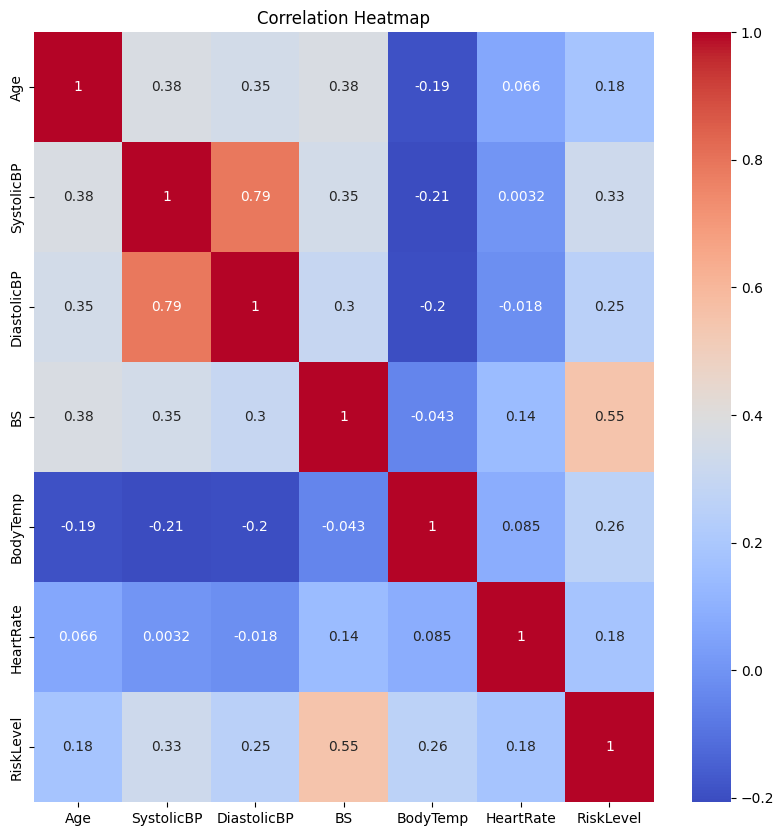

In [ ]:
# Drawing a correlation heat map
correlation_matrix = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

There are positive correlation between individual features to the target feature Risk Level.

The strongest one is Blood sugar showing a positive correlation of 0.55. Age and heartrate have weak positive correlations meaning that they have minimal impact to the Risk Level.

Stystolic BP and Diastolic BP are strongly correlated(0.79). As Systolic BP increases,Diastolic BP also tends to increase.

In [ ]:
# Checks how many values each class has
df['RiskLevel'].value_counts()

,count
RiskLevel,
0,406
1,336
2,272


**NOTE:**

There is a class imbalance in our dataset.

Low risk pregnancies are most frequent
with 234 instances. Followed by high risk at 112 and mid risk at 106.

This might lead to a bias towards predicting the majority class. For this assignment, we will use the dataset as it is.



# Data Pre-processing

In [ ]:
df.shape

(452, 7)

In [6]:
# Splitting the features and target variables
X = df.drop('RiskLevel', axis=1) # Features
y = df['RiskLevel']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()

# Fitting the training data
scaler.fit(X_train)

# Transforming the training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)



print(f'X_train shape: {X_train_scaled.shape}')
print(f'Y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test_scaled.shape}')
print(f'Y_test shape: {y_test.shape}')

X_train shape: (361, 6)
Y_train shape: (361,)
X_test shape: (91, 6)
Y_test shape: (91,)


# Vanilla Model Implementation

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
vanilla_model = Sequential()

# Input layer and first hidden layer (64 units, ReLU activation)
vanilla_model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))

# Second hidden layer (32 units, ReLU activation)
vanilla_model.add(Dense(32, activation='relu'))

# Output layer (3 classes softmax activation for  classification)
vanilla_model.add(Dense(3, activation='softmax'))

# Show model summary to check the architecture
vanilla_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 64)                  │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,627 (10.26 KB)

 Trainable params: 2,627 (10.26 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
vanilla_model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_vanilla = vanilla_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7809 - loss: 0.4780 - val_accuracy: 0.6986 - val_loss: 0.8135
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7990 - loss: 0.4679 - val_accuracy: 0.7123 - val_loss: 0.8056
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7921 - loss: 0.4620 - val_accuracy: 0.7123 - val_loss: 0.8096
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7872 - loss: 0.4674 - val_accuracy: 0.7123 - val_loss: 0.8122
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7764 - loss: 0.4771 - val_accuracy: 0.6986 - val_loss: 0.8137
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7722 - loss: 0.4899 - val_accuracy: 0.7123 - val_loss: 0.8090
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7800 - loss: 0.4916 - val_accuracy: 0.6712 - val_loss: 0.8259
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7868 - loss: 0.4645 - val_accuracy: 0.6849 - val_loss: 0.8242

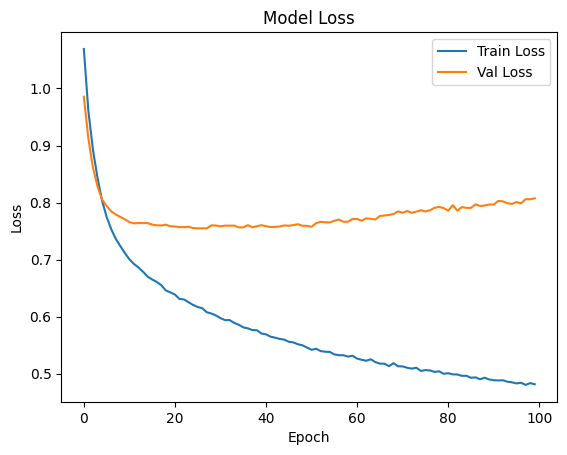

In [25]:
# Plot training & validation loss
plt.plot(history_vanilla.history['loss'], label='Train Loss')
plt.plot(history_vanilla.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [28]:
loss, accuracy = vanilla_model.evaluate(X_test_scaled, y_test)

print(f'Vanilla Model Test Loss: {loss}')
print(f'Vanilla Model Test Accuracy: {accuracy}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6390 - loss: 0.8148 
Vanilla Model Test Loss: 0.7978643774986267
Vanilla Model Test Accuracy: 0.6373626589775085


With the vanilla model, there is overfitting.

In [29]:
#saving the model
vanilla_model.save('Vanilla_model.h5')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step

Confusion Matrix:
 [[42  4  1]
 [19  5  2]
 [ 3  4 11]]

Classification Report:
               precision    recall  f1-score   support

    low risk       0.66      0.89      0.76        47
    mid risk       0.38      0.19      0.26        26
   high risk       0.79      0.61      0.69        18

    accuracy                           0.64        91
   macro avg       0.61      0.57      0.57        91
weighted avg       0.60      0.64      0.60        91


F1 Score: 0.6001014751014752

Accuracy: 0.6373626373626373

Recall: 0.6373626373626373

Specificity per class: [0.5, 0.8769230769230769, 0.958904109589041]


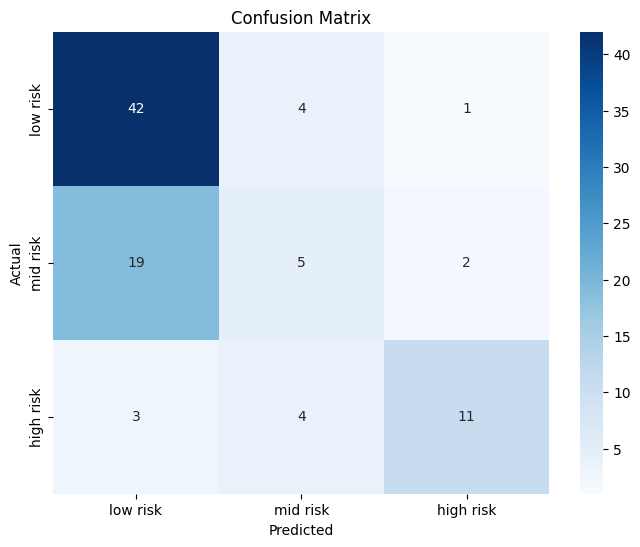

In [30]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score, recall_score
import numpy as np

y_pred_prob = vanilla_model.predict(X_test_scaled)

#Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred, target_names=['low risk', 'mid risk', 'high risk'])
print("\nClassification Report:\n", class_report)

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print("\nF1 Score:", f1)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Recall
recall = recall_score(y_test, y_pred, average='weighted')
print("\nRecall:", recall)

# Specificity
def calculate_multiclass_specificity(conf_matrix):
    specificity_per_class = []
    for i in range(conf_matrix.shape[0]):
        # True negatives (all values except current class row and column)
        tn = np.sum(conf_matrix) - (np.sum(conf_matrix[i, :]) + np.sum(conf_matrix[:, i]) - conf_matrix[i, i])
        # False positives (sum of the current class's column, except diagonal)
        fp = np.sum(conf_matrix[:, i]) - conf_matrix[i, i]
        # Specificity for class i
        specificity = tn / (tn + fp)
        specificity_per_class.append(specificity)
    return specificity_per_class

specificities = calculate_multiclass_specificity(conf_matrix)
print("\nSpecificity per class:", specificities)

import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['low risk', 'mid risk', 'high risk'], yticklabels=['low risk', 'mid risk', 'high risk'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



# Optimisation Techniques

In [13]:
from tensorflow.keras.regularizers import l1, l2

In [14]:
l2_model = Sequential()


# Input layer and first hidden layer
l2_model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],),
                   kernel_regularizer=l2(0.0001)))



# Second hidden layer
l2_model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.0001)))



# Output layer
l2_model.add(Dense(3, activation='softmax'))

optimizer = Adam(learning_rate=0.01)

l2_model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

l2_early_stopping = EarlyStopping(monitor='val_loss',
                                  patience=10,
                               restore_best_weights=True)

l2_model_fitted = l2_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32,
                               callbacks=[l2_early_stopping], validation_split=0.2, verbose=1)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.5596 - loss: 0.9893 - val_accuracy: 0.6712 - val_loss: 0.8040
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7259 - loss: 0.7236 - val_accuracy: 0.6575 - val_loss: 0.7714
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7211 - loss: 0.6747 - val_accuracy: 0.6575 - val_loss: 0.7899
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7205 - loss: 0.6501 - val_accuracy: 0.6438 - val_loss: 0.7828
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7883 - loss: 0.5567 - val_accuracy: 0.6438 - val_loss: 0.8068
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7710 - loss: 0.6000 - val_accuracy: 0.6849 - val_loss: 0.7660
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7560 - loss: 0.5757 - val_accuracy: 0.6849 - val_loss: 0.7760
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7731 - loss: 0.5643 - val_accuracy: 0.6712 - val_loss: 0.7904

In [15]:
loss, accuracy = l2_model.evaluate(X_test_scaled, y_test)

print(f'L2 Model Test Loss: {loss}')
print(f'L2 Model Test Accuracy: {accuracy}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7165 - loss: 0.7103 
L2 Model Test Loss: 0.7097567915916443
L2 Model Test Accuracy: 0.7142857313156128


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step

Confusion Matrix:
 [[46  0  1]
 [19  4  3]
 [ 2  1 15]]

Classification Report:
               precision    recall  f1-score   support

    low risk       0.69      0.98      0.81        47
    mid risk       0.80      0.15      0.26        26
   high risk       0.79      0.83      0.81        18

    accuracy                           0.71        91
   macro avg       0.76      0.66      0.63        91
weighted avg       0.74      0.71      0.65        91


F1 Score: 0.6509241381906917

Accuracy: 0.7142857142857143

Recall: 0.7142857142857143

Specificity per class: [0.5227272727272727, 0.9846153846153847, 0.9452054794520548]


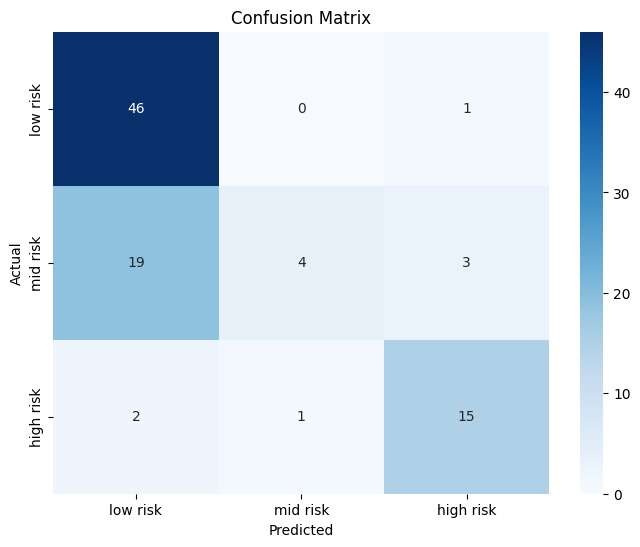

In [16]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score, recall_score

y_pred_prob = l2_model.predict(X_test_scaled)

#Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred, target_names=['low risk', 'mid risk', 'high risk'])
print("\nClassification Report:\n", class_report)

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print("\nF1 Score:", f1)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Recall
recall = recall_score(y_test, y_pred, average='weighted')
print("\nRecall:", recall)

# Specificity
def calculate_multiclass_specificity(conf_matrix):
    specificity_per_class = []
    for i in range(conf_matrix.shape[0]):
        # True negatives (all values except current class row and column)
        tn = np.sum(conf_matrix) - (np.sum(conf_matrix[i, :]) + np.sum(conf_matrix[:, i]) - conf_matrix[i, i])
        # False positives (sum of the current class's column, except diagonal)
        fp = np.sum(conf_matrix[:, i]) - conf_matrix[i, i]
        # Specificity for class i
        specificity = tn / (tn + fp)
        specificity_per_class.append(specificity)
    return specificity_per_class

specificities = calculate_multiclass_specificity(conf_matrix)
print("\nSpecificity per class:", specificities)

import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['low risk', 'mid risk', 'high risk'], yticklabels=['low risk', 'mid risk', 'high risk'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [17]:
# Saving the model
l2_model.save('L2_model.h5')

# Loading the saved model

In [59]:
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report

model = load_model('L2_model.h5')



loss, accuracy = model.evaluate(X_test_scaled, y_test)

print(f'L2 Model Test Loss: {loss}')
print(f'L2 Model Test Accuracy: {accuracy}')

predictions = model.predict(X_test_scaled)

print("Predicted Probabilities (Softmax Outputs):\n", predictions)

predicted_labels = np.argmax(predictions, axis=1)  # Get predicted class labels

print("\nPredicted Class Labels:\n", predicted_labels)

conf_matrix = confusion_matrix(y_test, predicted_labels)
print("Confusion Matrix:\n", conf_matrix)

class_report = classification_report(y_test, predicted_labels, target_names=['low risk', 'mid risk', 'high risk'])  # Replace with your class names
print("\nClassification Report:\n", class_report)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7165 - loss: 0.7103 
L2 Model Test Loss: 0.7097567915916443
L2 Model Test Accuracy: 0.7142857313156128
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Confusion Matrix:
 [[46  0  1]
 [19  4  3]
 [ 2  1 15]]

Classification Report:
               precision    recall  f1-score   support

    low risk       0.69      0.98      0.81        47
    mid risk       0.80      0.15      0.26        26
   high risk       0.79      0.83      0.81        18

    accuracy                           0.71        91
   macro avg       0.76      0.66      0.63        91
weighted avg       0.74      0.71      0.65        91

